In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer#necessary, although not directly used!
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_2_no_outliers.csv", index_col=0)

/tmp/ipykernel_3723/1984780673.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


We can see that only the feature "employees" contains 54 missing values.

In [3]:
print(base_df.isnull().sum())

revenues               0
ebit                   0
industry               0
employees             54
market_cap             0
outstanding_shares     0
stock_price            0
dtype: int64


We are using the IterativeImputer, which uses the data in all features of the dataset in order to impute the missing values. This method takes the other features as inputs and the missing feature column as output, and builds a regressor in order to predict the missing values. This is great, because the correlations between the features are used in order to make the predictions.


In [4]:
# Remove industry column
base_df_no_industry = base_df.drop(columns=["industry"])

In [5]:
imputer=IterativeImputer(max_iter=20, random_state=SEED)
imputer_train=imputer.fit_transform(base_df_no_industry)
df_imputed=pd.DataFrame(imputer_train, columns=base_df_no_industry.columns)
print(df_imputed)

         revenues          ebit      employees    market_cap  \
0    9.894661e+10  3.368791e+10   39161.284575  8.610166e+11   
1    8.989423e+10  5.421196e+10   39443.221065  1.169811e+12   
2    8.783573e+10  4.223690e+10   86764.936060  7.737738e+11   
3    7.903555e+10  2.921541e+10  157253.941191  6.624233e+11   
4    7.531216e+10  3.333325e+10   85562.800295  6.352531e+11   
..            ...           ...            ...           ...   
744  4.367233e+10  2.770794e+10   25275.189008  5.527104e+11   
745  5.439364e+10  3.002825e+10  126636.471476  2.344987e+11   
746  5.089252e+10  3.439496e+10  160595.850319  8.319590e+11   
747  4.411272e+10  2.596733e+10   16250.395261  2.355543e+11   
748  4.319270e+10  2.467498e+10   23151.681403  4.903870e+11   

     outstanding_shares  stock_price  
0          8.920990e+09    98.094205  
1          1.817962e+10    64.925081  
2          6.672160e+09   120.558326  
3          4.560541e+09   148.060378  
4          1.253771e+10    50.603175

Here, we also do a imputation with the SimpleImputer and the median, and compare the results to those of the IterativeImputer.

In [6]:
simple_imputer=SimpleImputer(strategy='mean')
simple_imputer_train=simple_imputer.fit_transform(base_df_no_industry)
df_simple_imputed=pd.DataFrame(simple_imputer_train, columns=base_df_no_industry.columns)
print(df_simple_imputed)

         revenues          ebit      employees    market_cap  \
0    9.894661e+10  3.368791e+10   39161.284575  8.610166e+11   
1    8.989423e+10  5.421196e+10  131075.241415  1.169811e+12   
2    8.783573e+10  4.223690e+10   86764.936060  7.737738e+11   
3    7.903555e+10  2.921541e+10  157253.941191  6.624233e+11   
4    7.531216e+10  3.333325e+10   85562.800295  6.352531e+11   
..            ...           ...            ...           ...   
744  4.367233e+10  2.770794e+10   25275.189008  5.527104e+11   
745  5.439364e+10  3.002825e+10  126636.471476  2.344987e+11   
746  5.089252e+10  3.439496e+10  160595.850319  8.319590e+11   
747  4.411272e+10  2.596733e+10   16250.395261  2.355543e+11   
748  4.319270e+10  2.467498e+10   23151.681403  4.903870e+11   

     outstanding_shares  stock_price  
0          8.920990e+09    98.094205  
1          1.817962e+10    64.925081  
2          6.672160e+09   120.558326  
3          4.560541e+09   148.060378  
4          1.253771e+10    50.603175

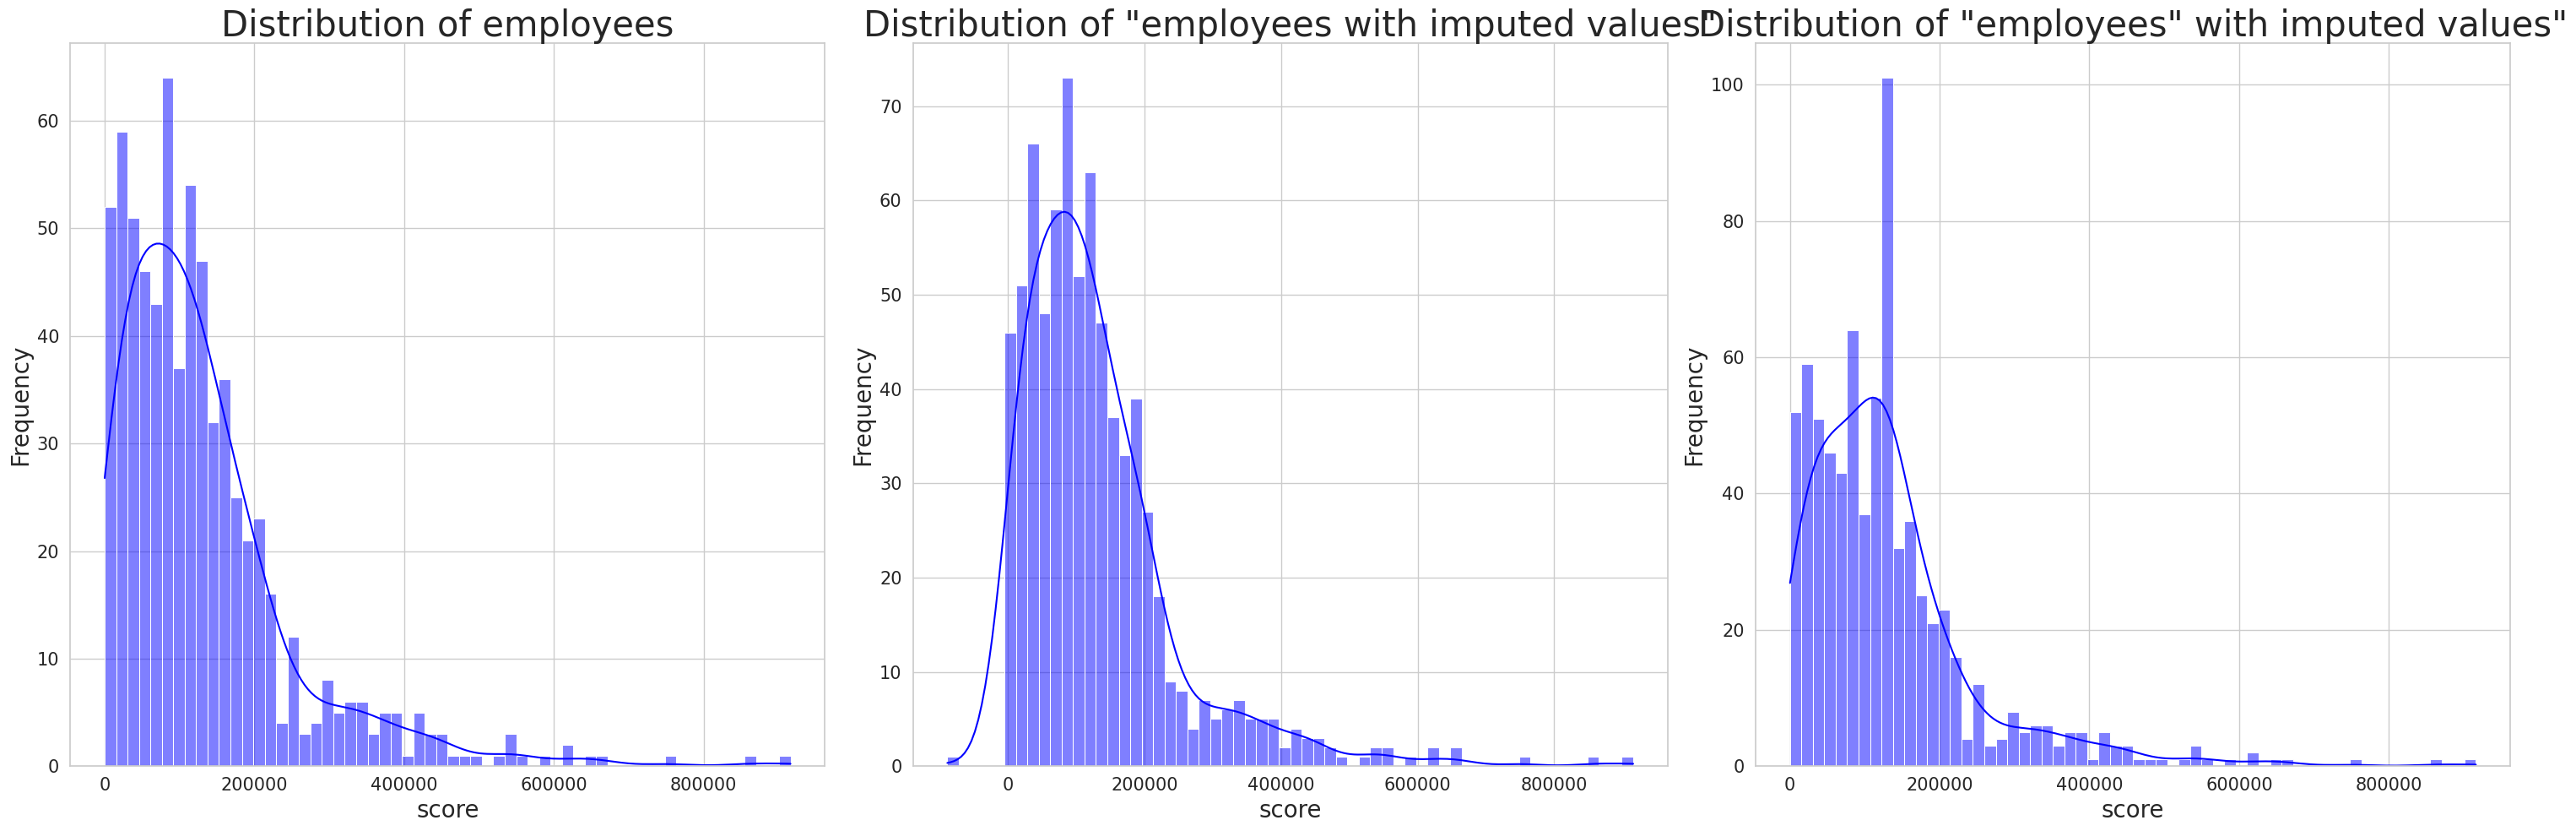

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))

plt.subplot(1, 3, 1)
sns.histplot(base_df["employees"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of employees', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 3, 2)
sns.histplot(df_imputed["employees"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "employees with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 3, 3)
sns.histplot(df_simple_imputed["employees"], kde=True, color='blue', bins=60)
plt.title(f'Distribution of "employees" with imputed values"', fontsize=30)
plt.xlabel(f'score', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

These images show the distributions after the imputations, on the first row with the IterativeImputer, in the second row with the SimpleImputer. For this dataset, the IterativeImputer seems to perform better, the existing distribution is better aproximated.

In [9]:
# Before storing the imputed data, we need to add the industry column back
df_imputed["industry"] = base_df["industry"]
df_imputed.to_csv("data_2_imputed.csv")